In [1]:
from packages import *
from taylor import *

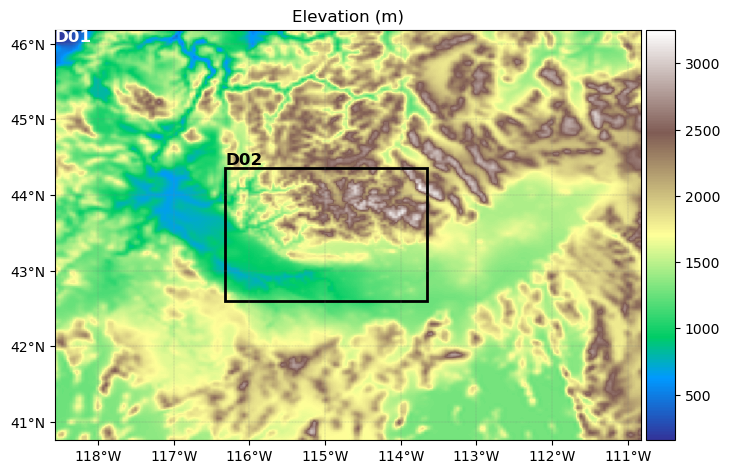

In [2]:
d01_path = '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d01_2021-09-29_00:00:00'
d02_path = '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00'

plot_wrf_domain(d01_path, d02_path)

In [3]:
path = '/bsuhome/stanleyakor/wateryear_2022/'
path2= '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00'

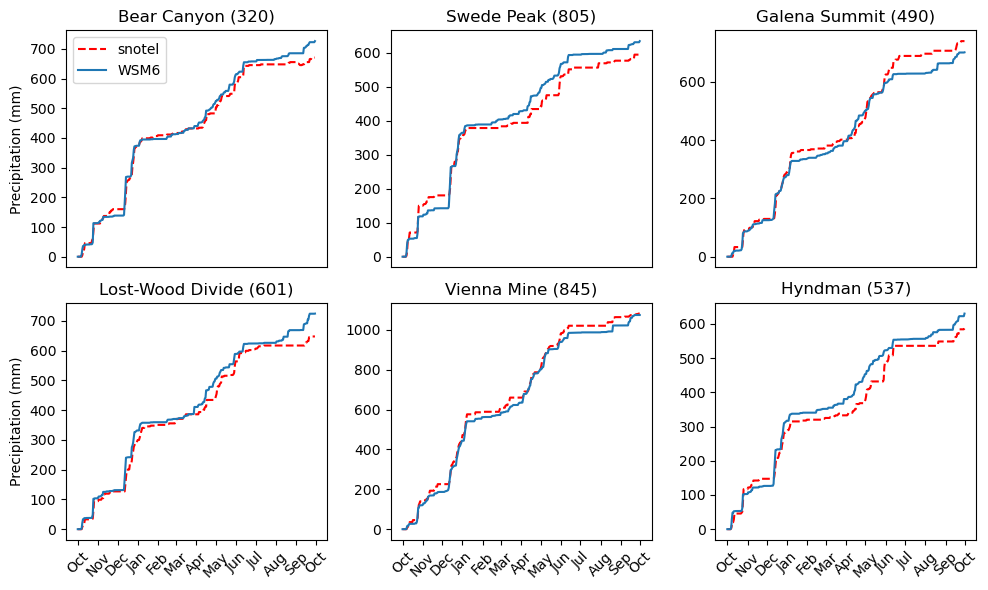

In [4]:

x = getclosest('NRCS_SNOTEL_Locations_noAlaska.csv','temp1',path2,path+'WSM6_22_daily.nc', 'WSM6_TEST')
x.compare_smallest()

In [5]:
file_list = {}
file_list['Morrison'] = path + 'MORRISON_22_daily.nc'
file_list['WDM6'] = path + 'WDM6_22_daily.nc'
file_list['Thompson'] = path + 'Thompson_22_daily.nc'

In [6]:
x = CompareScheme('NRCS_SNOTEL_Locations_noAlaska.csv','temp1',\
               '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00',\
               path + 'WSM6_22_daily.nc', 'TEST','WSM6')

Keys in sub-dictionary 'Morrison' do not match.


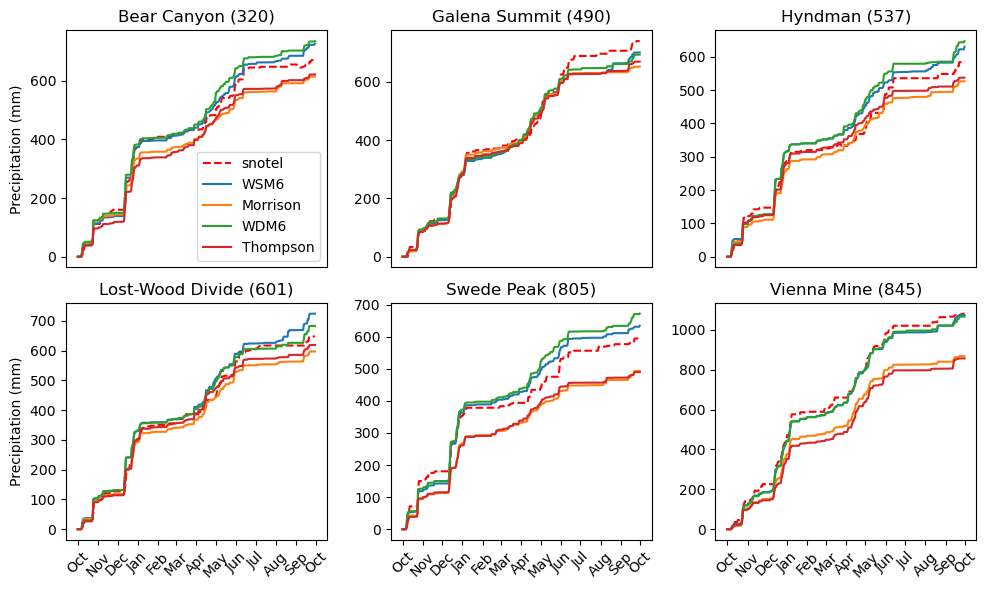

In [7]:
x.smallest(file_list)

In [8]:
# y = plot_snotel_grid('NRCS_SNOTEL_Locations_noAlaska.csv','temp1',\
#                '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00',\
#                path + 'WSM6_22_daily.nc', 'TEST','WSM6')

## Peak SWE/SNOWH day

Extract snow water equivalent and snow height variable from snotel, wrf and snodas on the data of peak accumulation ( April 1st, verify!)
https://nws.weather.gov/blog/nwsboise/tag/water-year/#:~:text=Around%20April%201%20(when%20Idaho's,south%20side%20Snake%20River%20basins.

In [9]:
#Extract and regrid snodas to wrf resolution

snodas_file='/bsuhome/stanleyakor/wateryear_2022/SNOWH_snodas_wateryear_2022_d02.nc'
sn_regrid = regrid_snodas(d02_path,snodas_file,'SNWZ')
snodas_file = sn_regrid.isel(XTIME=182) #184 - 2

In [10]:

histogram = hist('NRCS_SNOTEL_Locations_noAlaska.csv','temp2',\
               '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00',\
               path + 'WSM6_22_daily.nc', 'snowheight_station_compare','WSM6',snodas_file,case='snowh')

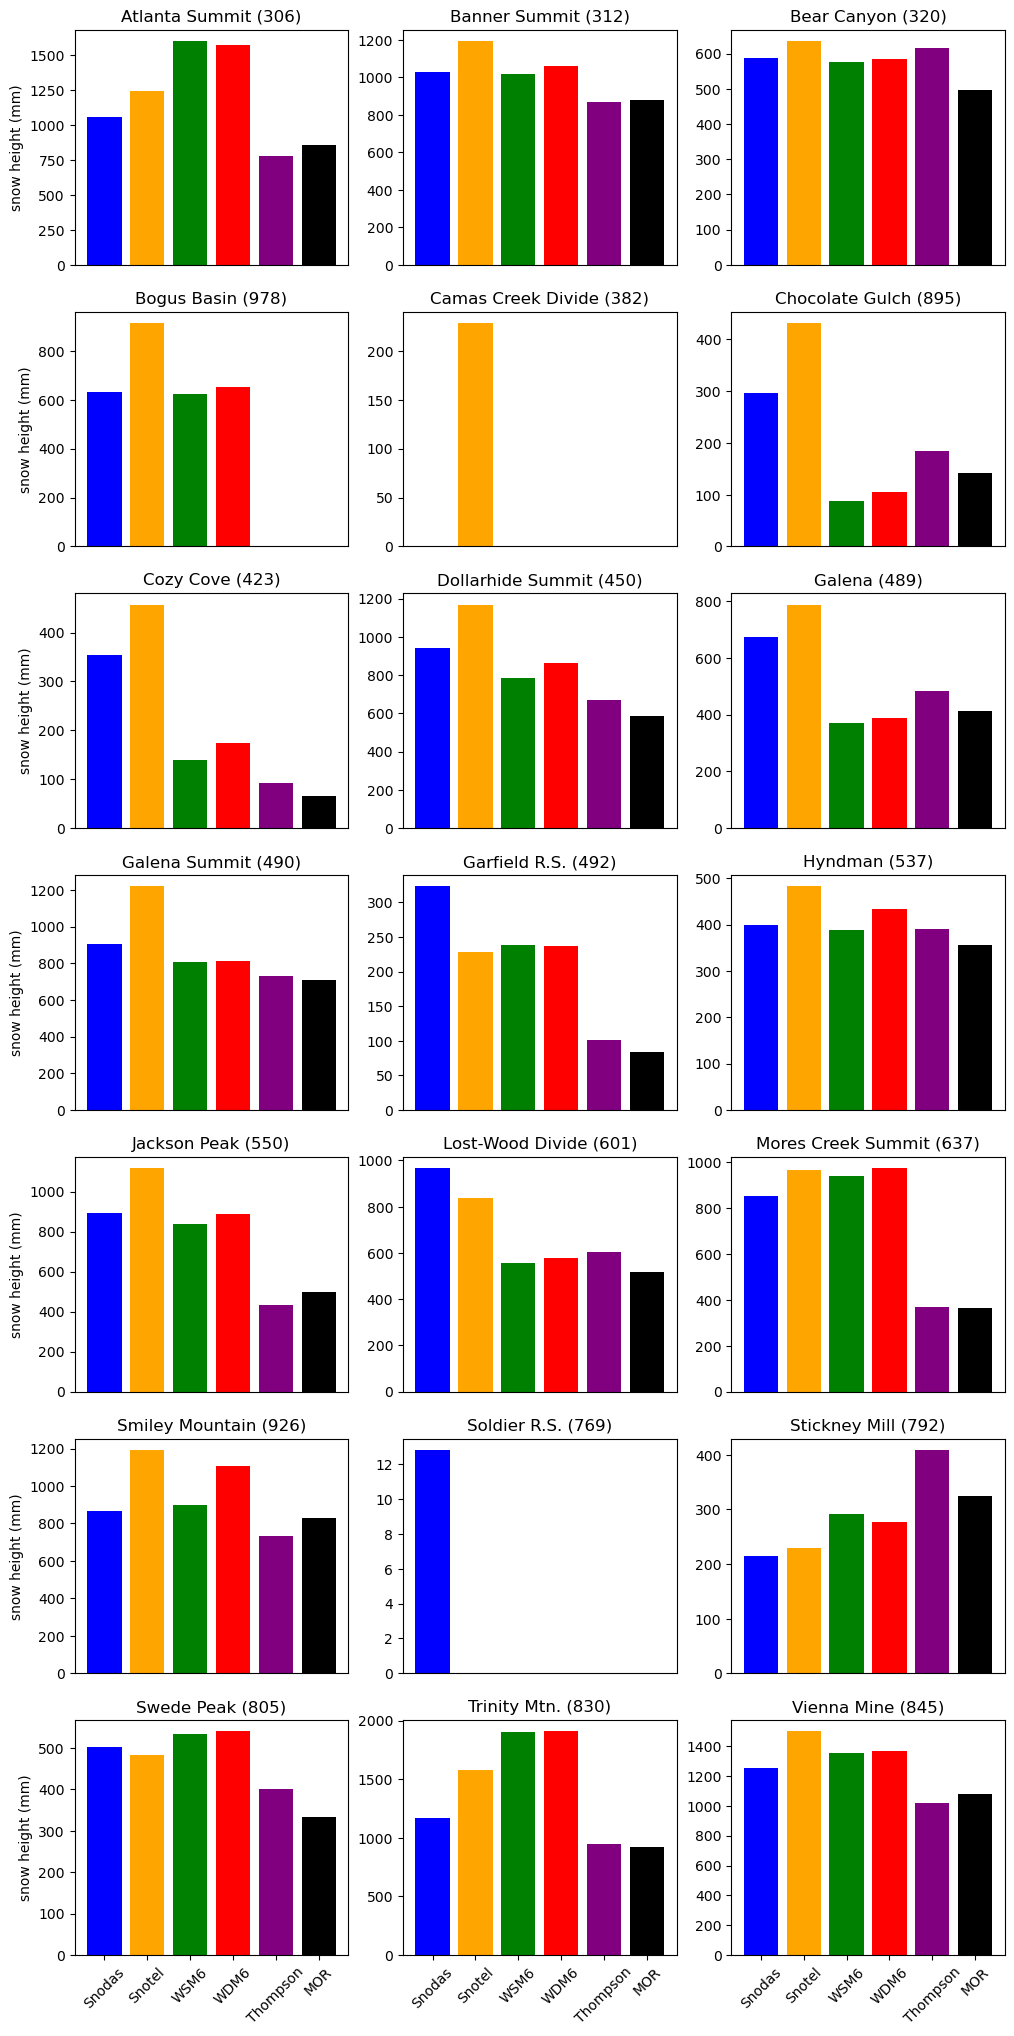

In [11]:
histogram.make_plots(file_list,'snow height (mm)')


In [12]:
'''
Now for snow water equivalent
'''

'\nNow for snow water equivalent\n'

In [13]:
#Extract and regrid snodas to wrf resolution

snodas_file='/bsuhome/stanleyakor/wateryear_2022/SWE_snodas_wateryear_2022_d02.nc'
sn_regrid = regrid_snodas(d02_path,snodas_file,'SWE')
snodas_file = sn_regrid.isel(XTIME=182)

In [14]:

histogram = hist('NRCS_SNOTEL_Locations_noAlaska.csv','temp2',\
               '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00',\
               path + 'WSM6_22_daily.nc', 'swe_station_compare','WSM6',snodas_file,case='swe')

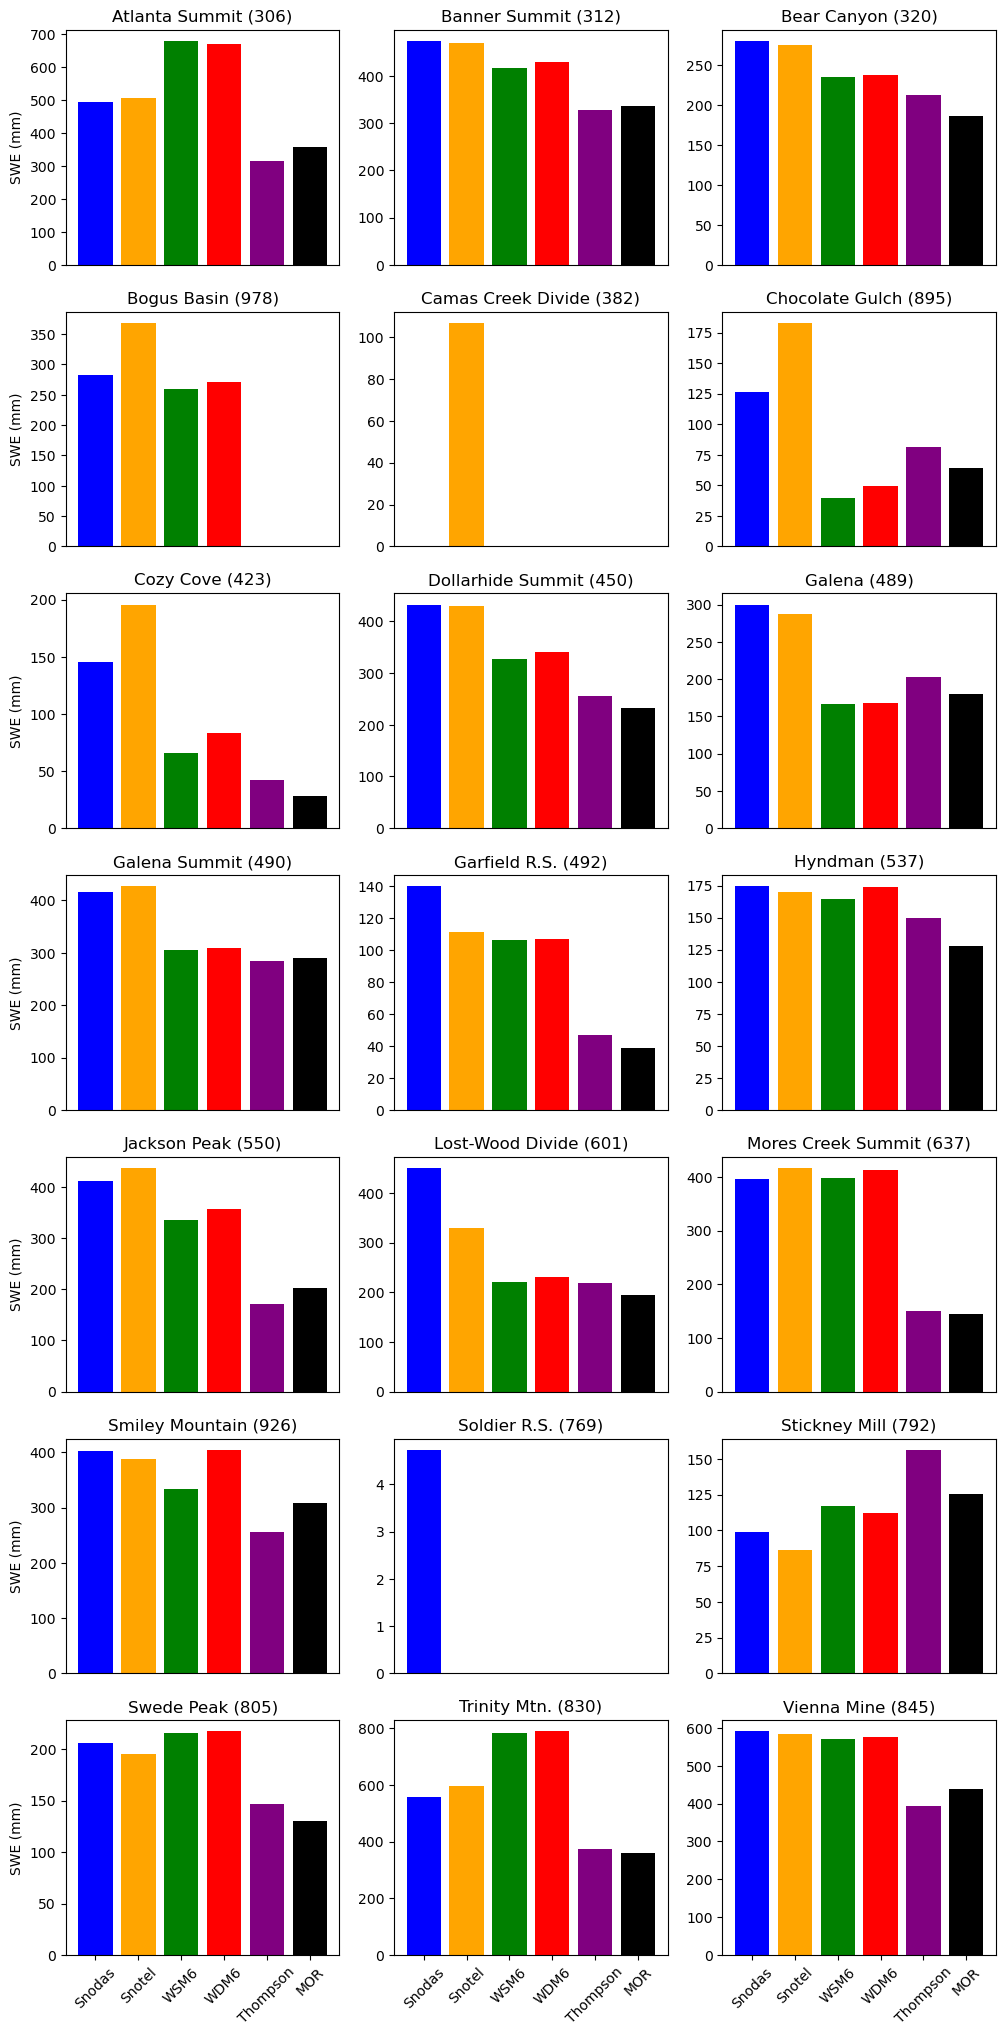

In [15]:
histogram.make_plots(file_list,'SWE (mm)')

In [16]:
thompson = xr.open_dataset('/bsuhome/stanleyakor/wateryear_2022/Thompson_22_daily.nc')
morrison = xr.open_dataset('/bsuhome/stanleyakor/wateryear_2022/MORRISON_22_daily.nc')
wsm6 = xr.open_dataset('/bsuhome/stanleyakor/wateryear_2022/WSM6_22_daily.nc')
wdm6 = xr.open_dataset('/bsuhome/stanleyakor/wateryear_2022/WDM6_22_daily.nc')
snodas = xr.open_dataset('/bsuhome/stanleyakor/wateryear_2022/SWE_snodas_wateryear_2022_d02.nc')

In [17]:
thomson_swe_april1 = thompson['SNOW'].isel(XTIME=184)  # APRIL 1
morrison_swe_april1 = morrison['SNOW'].isel(XTIME=184)
wsm6_swe_april1 = wsm6['SNOW'].isel(XTIME=184)
wdm6_swe_april1 = wdm6['SNOW'].isel(XTIME=184)

In [18]:
snodas_file='/bsuhome/stanleyakor/wateryear_2022/SWE_snodas_wateryear_2022_d02.nc'
sn_regrid_swe= regrid_snodas(d02_path,snodas_file,'SWE')
snodas_file = sn_regrid_swe.isel(XTIME=182)

In [19]:
file_list = [snodas_file,wsm6_swe_april1,wdm6_swe_april1, thomson_swe_april1,morrison_swe_april1 ]
title = ['Snodas','WSM6', 'WDM6', 'Thompson', 'Morrison'] #

la_lon = xr.open_dataset(d02_path)
lat = la_lon['XLAT'].isel(Time = 0)
lon = la_lon['XLONG'].isel(Time = 0)

In [20]:
def axis_create(axis,data, lat, lon, vmax, vmin, colour, label):
    im = axis.imshow(data, extent=(lon.min(), lon.max(), lat.min(), lat.max()),vmax=vmax, vmin = vmin, cmap=colour, origin='lower', alpha=1.0)
    axis.xaxis.set_major_locator(plt.MultipleLocator(base=1.0))
    axis.yaxis.set_major_locator(plt.MultipleLocator(base=0.4))
    lon_ticks = axis.get_xticks()
    lat_ticks = axis.get_yticks()
    lon_labels = [f'{abs(lon):.2f}°{"W" if lon < 0 else "E"}' for lon in lon_ticks]
    lat_labels = [f'{abs(lat):.2f}°{"S" if lat < 0 else "N"}' for lat in lat_ticks]
    axis.set_xticklabels(lon_labels)
    axis.set_yticklabels(lat_labels)
    axis.set_title(label)
    return im, axis
        

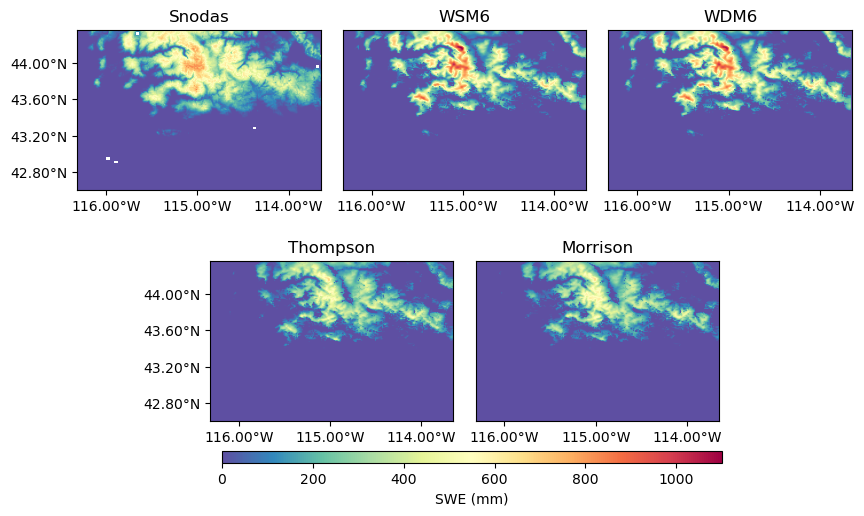

In [21]:
vmax = max(np.nanmax(ds.values) for ds in file_list)
vmin = min(np.nanmin(ds.values) for ds in file_list)

#fig = plt.figure(figsize=(10,6))

# Create subplots using plt.subplot2grid
ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 6), (0, 2), colspan=2)
ax3 = plt.subplot2grid((2, 6), (0, 4), colspan=2)
ax4 = plt.subplot2grid((2, 6), (1, 1), colspan=2)
ax5 = plt.subplot2grid((2, 6), (1, 3), colspan=2)

im1, ax1 = axis_create(ax1,file_list[0], lat, lon, vmax, vmin, 'Spectral_r', title[0])
im2, ax2 = axis_create(ax2,file_list[1], lat, lon, vmax, vmin, 'Spectral_r', title[1])
im3, ax3 = axis_create(ax3,file_list[2], lat, lon, vmax, vmin, 'Spectral_r', title[2])
im4, ax4 = axis_create(ax4,file_list[3], lat, lon, vmax, vmin, 'Spectral_r', title[3])
im5, ax5 = axis_create(ax5,file_list[4], lat, lon, vmax, vmin, 'Spectral_r', title[4])

# Turn off axis labels for all other subplots
for ax in [ax2, ax3, ax5]:
    #ax.set_xticks([])
    ax.set_yticks([])
    
# Adjust layout spacing by modifying figure size and subplot parameters
fig = plt.gcf()

# Add color bar horizontally centered and half the length of the axes
cbar_ax = fig.add_axes([0.27, 0.1, 0.5, 0.02])  # Adjust the position and size as needed
cbar = fig.colorbar(im5, cax=cbar_ax, orientation='horizontal')
cbar.set_label('SWE (mm)')

fig.set_size_inches(10, 6)  # Adjust the size as needed
plt.subplots_adjust(hspace=0.0)  # Adjust the value as needed
plt.savefig('compare.pdf',dpi=300)

plt.show()


In [22]:
file_list = [wsm6_swe_april1 - snodas_file,wdm6_swe_april1 - snodas_file,  thomson_swe_april1 - snodas_file,morrison_swe_april1 - snodas_file]
title = ['WSM6 - SNODAS', 'WDM6 - SNODAS', 'Thompson - SNODAS', 'Morrison - SNODAS'] #

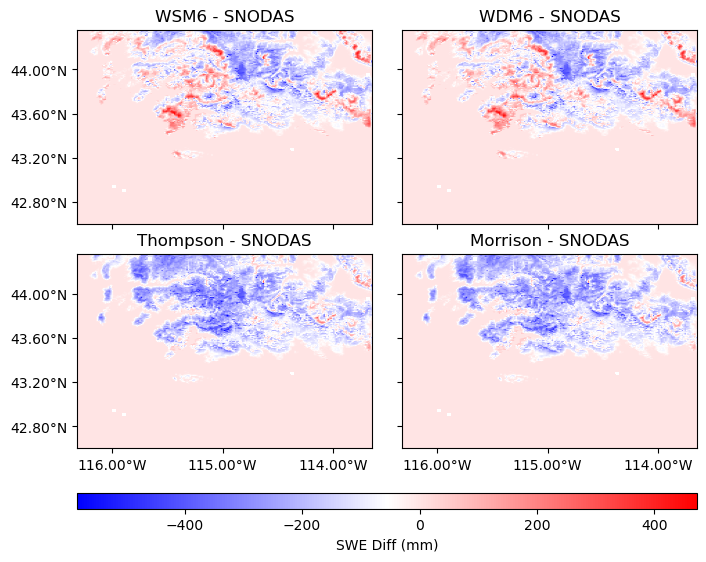

In [23]:
make_snodas_Wrf_plots(file_list, title, lat, lon, 'bias_SWE_APril_1',\
                      'SWE Diff (mm)',subplots=(2,2), colour='bwr', size = (8, 12),save = True)

In [24]:
thomson_swh_april1 = thompson['SNOWH'].isel(XTIME=184)*1e3 # APRIL 1
morrison_swh_april1 = morrison['SNOWH'].isel(XTIME=184)*1e3 
wsm6_swh_april1 = wsm6['SNOWH'].isel(XTIME=184)*1e3 
wdm6_swh_april1 = wdm6['SNOWH'].isel(XTIME=184)*1e3 

In [25]:
snodas_file='/bsuhome/stanleyakor/wateryear_2022/SNOWH_snodas_wateryear_2022_d02.nc'
sn_regrid_sh = regrid_snodas(d02_path,snodas_file,'SNWZ')
snodas_file = sn_regrid_sh.isel(XTIME=182)

In [26]:
file_list = [snodas_file,wsm6_swh_april1,wdm6_swh_april1, thomson_swh_april1,morrison_swh_april1 ]
title = ['Snodas','WSM6', 'WDM6', 'Thompson', 'Morrison'] #



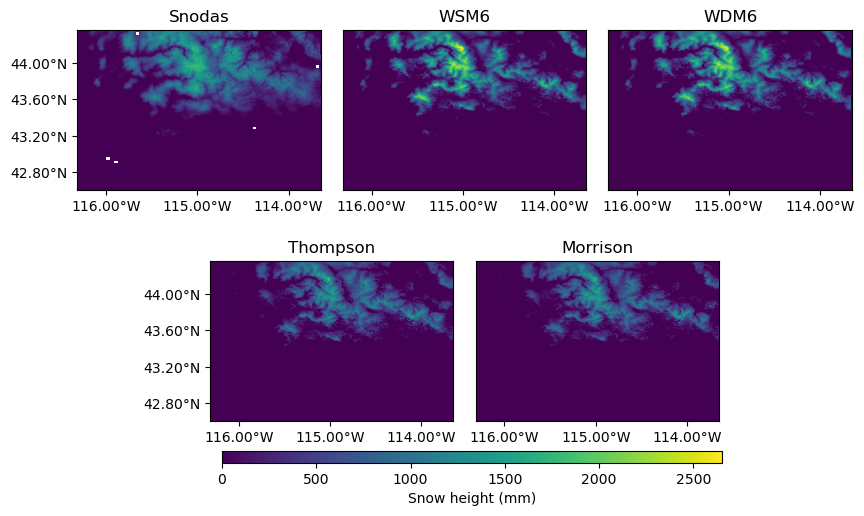

In [27]:
vmax = max(np.nanmax(ds.values) for ds in file_list)
vmin = min(np.nanmin(ds.values) for ds in file_list)

#fig = plt.figure(figsize=(10,6))

# Create subplots using plt.subplot2grid
ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 6), (0, 2), colspan=2)
ax3 = plt.subplot2grid((2, 6), (0, 4), colspan=2)
ax4 = plt.subplot2grid((2, 6), (1, 1), colspan=2)
ax5 = plt.subplot2grid((2, 6), (1, 3), colspan=2)

im1, ax1 = axis_create(ax1,file_list[0], lat, lon, vmax, vmin, 'viridis', title[0])
im2, ax2 = axis_create(ax2,file_list[1], lat, lon, vmax, vmin, 'viridis', title[1])
im3, ax3 = axis_create(ax3,file_list[2], lat, lon, vmax, vmin, 'viridis', title[2])
im4, ax4 = axis_create(ax4,file_list[3], lat, lon, vmax, vmin, 'viridis', title[3])
im5, ax5 = axis_create(ax5,file_list[4], lat, lon, vmax, vmin, 'viridis', title[4])

# Turn off axis labels for all other subplots
for ax in [ax2, ax3, ax5]:
    #ax.set_xticks([])
    ax.set_yticks([])
    
# Adjust layout spacing by modifying figure size and subplot parameters
fig = plt.gcf()

# Add color bar horizontally centered and half the length of the axes
cbar_ax = fig.add_axes([0.27, 0.1, 0.5, 0.02])  # Adjust the position and size as needed
cbar = fig.colorbar(im5, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Snow height (mm)')

fig.set_size_inches(10, 6)  # Adjust the size as needed
plt.subplots_adjust(hspace=0.0)  # Adjust the value as needed
#plt.savefig('compare.pdf',dpi=300)

plt.show()


In [28]:
def prep_taylor(th,mor,wsm6,wdm7, sn_regrid_sh,type):
    
    if type == 'SNOWH':
        th_spatial_mean = th['SNOWH'].mean(dim = ('south_north', 'west_east'))[2:-1]*1e3
        mor_spatial_mean = mor['SNOWH'].mean(dim = ('south_north', 'west_east'))[2:-1]*1e3
        wsm6_spatial_mean = wsm6['SNOWH'].mean(dim = ('south_north', 'west_east'))[2:-1]*1e3
        wdm6_spatial_mean = wdm6['SNOWH'].mean(dim = ('south_north', 'west_east'))[2:-1]*1e3
        snodas_sp_mean = sn_regrid_sh.mean(dim = ('south_north', 'west_east'))
        
    else:
        th_spatial_mean = thompson['SNOW'].mean(dim = ('south_north', 'west_east'))[2:-1]
        snodas_sp_mean = sn_regrid_sh.mean(dim = ('south_north', 'west_east'))
        mor_spatial_mean = morrison['SNOW'].mean(dim = ('south_north', 'west_east'))[2:-1]
        wsm6_spatial_mean = wsm6['SNOW'].mean(dim = ('south_north', 'west_east'))[2:-1]
        wdm6_spatial_mean = wdm6['SNOW'].mean(dim = ('south_north', 'west_east'))[2:-1]


    samples = [[float(np.std(th_spatial_mean)),np.corrcoef(snodas_sp_mean,th_spatial_mean)[0,1], "Thom"],  
            [float(np.std(mor_spatial_mean)),np.corrcoef(snodas_sp_mean,mor_spatial_mean)[0,1], "Mor"],  
            [float(np.std(wsm6_spatial_mean)),np.corrcoef(snodas_sp_mean,wsm6_spatial_mean)[0,1], "WSM6"], 
            [float(np.std(wdm6_spatial_mean)),np.corrcoef(snodas_sp_mean,wdm6_spatial_mean)[0,1], "WDM6"]]


    return float(np.std(snodas_sp_mean)), samples
    
        
        
        
    

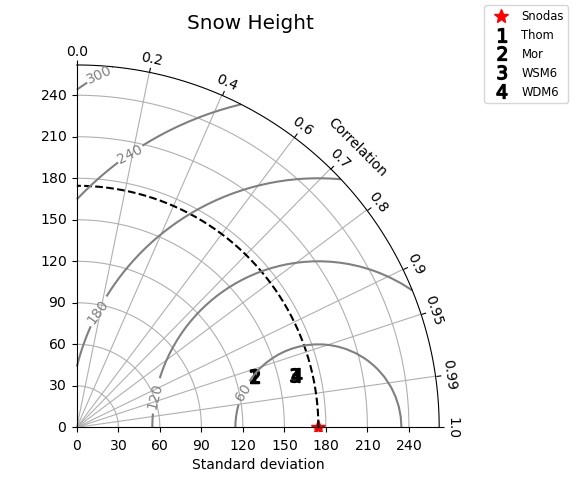

In [29]:
"""
Taylor diagram (Taylor, 2001) implementation.
Note: If you have found these software useful for your research, I would
appreciate an acknowledgment.
"""

__version__ = "Time-stamp: <2018-12-06 11:43:41 ycopin>"
__author__ = "Yannick Copin <yannick.copin@laposte.net>"

stdref, samples = prep_taylor(thompson, morrison, wsm6, wdm6, sn_regrid_sh, 'SNOWH')
dia = test2(stdref, samples, 'Snow Height')

PLT.show()

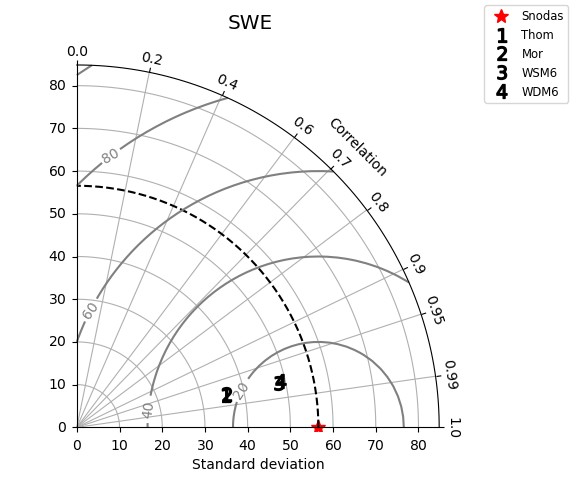

In [30]:
stdref, samples = prep_taylor(thompson, morrison, wsm6, wdm6, sn_regrid_swe, 'SNOW')
dia = test2(stdref, samples,'SWE')

PLT.show()

## COMPUTE STATION CORRELATION WITH SNOTEL AND/OR SNODAS

In [31]:
file_list = {}
file_list['Morrison'] = path + 'MORRISON_22_daily.nc'
file_list['WDM6'] = path + 'WDM6_22_daily.nc'
file_list['Thompson'] = path + 'Thompson_22_daily.nc'

In [32]:
corr = station_corr('NRCS_SNOTEL_Locations_noAlaska.csv','temp2',\
               '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00',\
               path + 'WSM6_22_daily.nc', 'TEST','WSM6')

In [33]:
corr.make(file_list)

 Precipitation correlation coefficient across microphysics schemes
                          WSM6_cor  WDM6_cor  Thompson_cor  Morrison_cor
Name                                                                    
Atlanta Summit (306)      0.997348  0.996862      0.997512      0.997202
Banner Summit (312)       0.992838  0.995009      0.994321      0.993258
Bear Canyon (320)         0.997793  0.997197      0.996269      0.997787
Bogus Basin (978)         0.994355  0.994670      0.986467      0.983861
Camas Creek Divide (382)  0.993280  0.994184      0.989850      0.990228
Chocolate Gulch (895)     0.997469  0.998650      0.997253      0.998456
Cozy Cove (423)           0.988858  0.990835      0.986274      0.984046
Dollarhide Summit (450)   0.985935  0.988344      0.993252      0.993020
Galena (489)              0.997881  0.997536      0.997492      0.997606
Galena Summit (490)       0.996052  0.996247      0.996534      0.994464
Garfield R.S. (492)       0.994358  0.991210      0.98951